# Predicting House Prices using Simple and Multiple Regression

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [2]:
#Load Data from csv
sales = pd.read_csv('test1.csv')

In [3]:
#Examine Data
print(sales.shape)
sales.head(5)


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(sales.columns)
sales.describe()


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


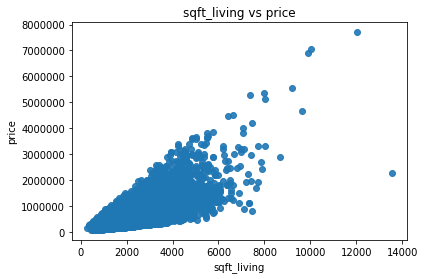

In [5]:
#Plotting scatter plot sqft_living vs price
plt.scatter(sales['sqft_living'], sales['price'], alpha=0.9)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living vs price');


## Regresion model to predict house price on sqft_living


In [6]:
# Step 1 : Load Data
X = sales[['sqft_living']]
y = sales['price']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=5)
print(X.shape, Xtrain.shape , Xtest.shape , ytrain.shape, ytest.shape)


(21613, 1) (16209, 1) (5404, 1) (16209,) (5404,)


In [7]:
# Step 2 : Build Model
linreg_sqft = LinearRegression()

In [8]:
# Step 3 : Learn
linreg_sqft.fit(Xtrain,ytrain)
print(linreg_sqft)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [9]:
# Step 4 : Predict
ypredict = linreg_sqft.predict(Xtest)

In [10]:
# Step 5 : Evaluate
mse = mean_squared_error(ytest,ypredict)
print('RMSE', math.sqrt(mse))

RMSE 257125.13549445712


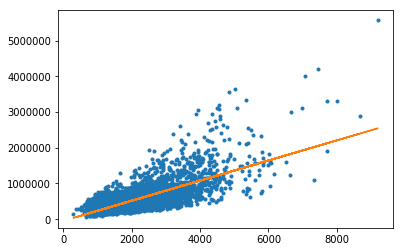

In [11]:
# Plot Regression 
plt.plot(Xtest,ytest,'.',Xtest,ypredict,'-');

In [12]:
print('intercept:', linreg_sqft.intercept_)
print('slope', linreg_sqft.coef_)

intercept: -45441.3046014
slope [ 281.40543422]


## Multiple Linear Regresssion

In [13]:

my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
print(sales[my_features][:10])

# Step 1 : Load Data
X = sales[my_features]
y = sales['price']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=5)
print(X.shape, Xtrain.shape , Xtest.shape , ytrain.shape, ytest.shape)

# Step 2 : Build Model
linreg = LinearRegression()

# Step 3 : Learn
linreg.fit(Xtrain,ytrain)

# Step 4 : Predict
ypredict = linreg.predict(Xtest)

# Step 5 : Evaluate
mse = mean_squared_error(ytest,ypredict)
print('RMSE', math.sqrt(mse))


   bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode
0         3       1.00         1180      5650     1.0    98178
1         3       2.25         2570      7242     2.0    98125
2         2       1.00          770     10000     1.0    98028
3         4       3.00         1960      5000     1.0    98136
4         3       2.00         1680      8080     1.0    98074
5         4       4.50         5420    101930     1.0    98053
6         3       2.25         1715      6819     2.0    98003
7         3       1.50         1060      9711     1.0    98198
8         3       1.00         1780      7470     1.0    98146
9         3       2.50         1890      6560     2.0    98038
(21613, 6) (16209, 6) (5404, 6) (16209,) (5404,)
RMSE 251717.22678098932


In [14]:
#Examine prediction of house 1
house1 = sales[:1]

In [15]:
my_house1 = house1[my_features]
print(my_house1)
my_house1_sqft = house1[['sqft_living']]
print(my_house1_sqft)
my_house1_price = house1['price']
print(my_house1_price)

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode
0         3        1.0         1180      5650     1.0    98178
   sqft_living
0         1180
0    221900
Name: price, dtype: int64


In [16]:
ypredict_house1 = linreg.predict(my_house1)
ypredict_house1_sqft = linreg_sqft.predict(my_house1_sqft)
print(house1['price'])
print(ypredict_house1)
print(ypredict_house1_sqft)

0    221900
Name: price, dtype: int64
[ 327987.66701315]
[ 286617.10778306]


7700000
98102


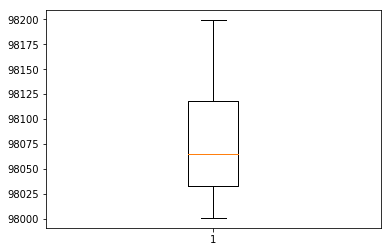

In [17]:
#zipcode for max house price
house_maxprice = sales['price'].max()
print(house_maxprice)
house_maxprice_zipcode = sales.sort_values('price', ascending=False)['zipcode'].iloc[0]
print(house_maxprice_zipcode)

plt.boxplot(sales['zipcode']);


In [18]:
# Finding zipcode with highest average price
zipcode_avgprice = sales.groupby('zipcode')['price'].mean()
zipcode_avgprice.sort_values(ascending=False).index[0]

98039

In [19]:
# What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?
sales_between = sales.loc[ (sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)]
print(sales_between.shape[0]/sales.shape[0])


0.4266413732475825
